# Climate Data Store (CDS) -  Backend


Copernicus Climate Change Service (C3S) - Upper Air Data Service

This IPython Notebook is intended for demonstration purposes and example usage of the Climate Data Store (CDS) Backend for Radiosonde data.

For further information please refer to the Deliverable Document on [Github CEUAS](https://github.com/MBlaschek/CEUAS/tree/master/CEUAS/public/cds-backend).


    Author: M. Blaschek
    Date: 01.2020
    Contact: michael.blaschek [at] univie.ac.at
    

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
# Plotting parameters
plt.rcParams['figure.figsize'] = [12.0, 6.0]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 15
plt.style.use('seaborn-colorblind')
yplevs = np.array([10,30,70,125,175,225,300,400,500,700,925])*100.

In [3]:
#
# Make sure you have Python 3
#
from platform import python_version
if python_version()[0] != '3':
    print("Your Version:", python_version())
    raise RuntimeError("This Notebook requires Python 3")

# Functionality of the delivering server
The delivered server allows to respond to post requests and delivers the requested data in a compressed format (zip).
The interface can be a pure python code or via a linux shell.

* [Python Interface](#Python-version)
* [Shell Interface](#Shell)


A typical request should contain:
1. **statid** - the Station Identifier
    * e.g. `'11035' or ['11035','72357'] or 'all'`
2. **date** - datetime selection YYYYMMDD
    * e.g. `one day 19990101 or a range [19990101, 19991231]`
3. **pressure_level** - selection of pressure levels
    * e.g. `one level [85000] or [50000, 85000] or no keyword for all significant levels`
4. **variable** - selection of variables 
    * e.g. `'temperature', 'relative_humidity', ...`
5. **fbstats**  - feedback information from reanalysis
    * e.g. `'obs_minus_an', obs_minus_fg', ...`

## Python version

In [19]:
import requests, zipfile, io, os
# http://early-upper-air.copernicus-climate.eu
r = requests.post('http://srvx8.img.univie.ac.at:8004',
                  headers={'content-type': 'application/json'},
                  json={"statid": "11035",
                        "date": [20000101, 20000101],
                        "pressure_level": [1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 40000,
                                           50000, 70000, 85000, 92500, 100000],
                        "variable": ["temperature", "relative_humidity"],
                        "fbstats": ["obs_minus_bg", "obs_minus_an", "bias_estimate"]
                        },
                  stream=True)
#
# Check for known Error Message
#
if r.status_code != requests.codes.ok
     print(r.text)
     raise RuntimeError("Something is not correct with the request")
#
# Create directory
#
if not os.path.isdir('./example_data'):
    os.makedirs('./example_data')
#
# Unzip the Data Stream
#
try:
    z = zipfile.ZipFile(io.BytesIO(r.content))
    print("Retreived files: ")
    print(z.namelist())
    z.extractall(path='./example_data')
    z.close()
except:
    print(r.text)
    print("Error in request")

Retreived files: 
dest_11035_air_temperature.nc./example_data/dest_11035_relative_humidity.nc


## Shell

Another Way can be use a Linux tool called `curl` to download a zipfile:


In [ ]:
! curl -H "Content-Type: application/json" -X POST --digest --data '{"statid":"11035","date":[19990101,19990101],"pressure_level":[1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 70000, 85000, 92500, 100000],"variable":["temperature","relative_humidity"],"fbstats":["obs_minus_bg","obs_minus_an","bias_estimate"]}' -o example_data/download.zip http://early-upper-air.copernicus-climate.eu

and then unzip the contents in the directory

In [ ]:
!unzip -o example_data/download.zip

In [20]:
# Show the new downloaded files in example_data directory
!tree -Dhr

.
├── [126K Jan 24 15:43]  Example.ipynb
├── [  80 Jan 24 15:23]  example_data
│   ├── [ 37K Jan 24 15:43]  dest_11035_relative_humidity.nc
│   └── [ 37K Jan 24 15:43]  dest_11035_air_temperature.nc
└── [   6 Jan 24  9:28]  code

2 directories, 3 files


# Request a profile

Tasks:
* One station: `11035`
* One datetime: `20000101`
* Two variables: `temperature, relative humidity`
* Notice no `pressure_level`, requesting significant level data.

In [125]:
import requests, zipfile, io, os
# http://early-upper-air.copernicus-climate.eu
#
# All levels for one day
#
r = requests.post('http://srvx8.img.univie.ac.at:8004',
                  headers={'content-type': 'application/json'},
                  json={"statid": "11035",
                        "date": [20000101, 20000101],
                        "variable": ["temperature", "relative_humidity"]
                        },
                  stream=True)
#
# Check for known Error Message
#
if r.status_code != requests.codes.ok
     print(r.text)
     raise RuntimeError("Something is not correct with the request")
#
# Create directory
#
if not os.path.isdir('./example_data'):
    os.makedirs('./example_data')
#
# Unzip the Data Stream
#
try:
    z = zipfile.ZipFile(io.BytesIO(r.content))
    print("Retreived files: ")
    print(z.namelist())
    z.extractall(path='./example_data')
    z.close()
except:
    print(r.text)
    print("Error in request")

Retreived files: 
['dest_11035_air_temperature.nc', 'dest_11035_relative_humidity.nc']


Read the NetCDF data with xarray

In [29]:
tdata = xr.load_dataset('example_data/dest_11035_air_temperature.nc')
rdata = xr.load_dataset('example_data/dest_11035_relative_humidity.nc')

In [30]:
tdata

<xarray.Dataset>
Dimensions:           (obs: 190, trajectory: 2)
Coordinates:
    lat               (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    lon               (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    plev              (obs) float32 590.0 660.0 760.0 ... 95700.0 97400.0
    time              (obs) datetime64[ns] 2000-01-01 ... 2000-01-01T12:00:00
Dimensions without coordinates: obs, trajectory
Data variables:
    ta                (obs) float32 211.3 nan 206.5 205.9 ... 269.7 271.9 nan
    trajectory_index  (obs) int32 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1
    trajectory_label  (trajectory) |S5 b'30635' b'30637'
Attributes:
    primary_id:    0-20000-0-11035
    station_name:  WIEN/HOHE WARTE (11035-0)
    Conventions:   CF-1.7
    source:        radiosonde
    featureType:   trajectory
    history:       Created by Copernicus Early Upper Air Service Version 0, 2...

## Plot Profile

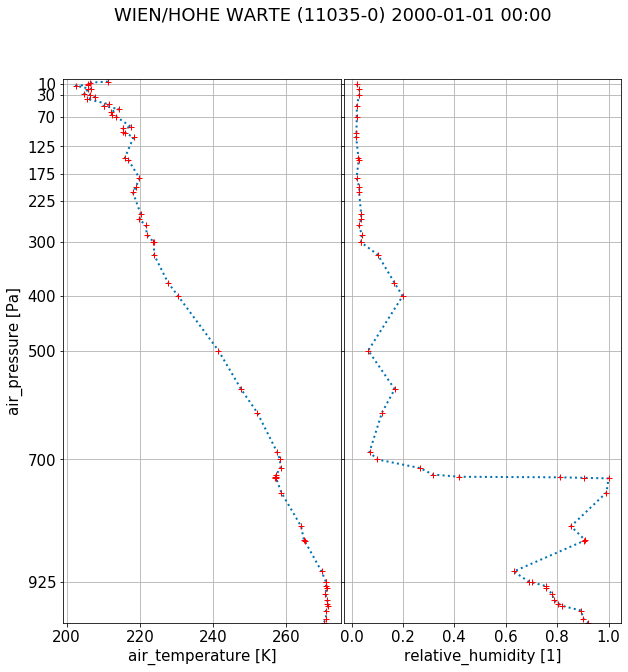

In [107]:
#
# Select 00Z, change dimension to pressure, drop missing values
#
plotdata = tdata.sel(obs=tdata.time.dt.hour==0).ta.swap_dims({'obs':'plev'}).to_dataset()
plotdata['hur'] = rdata.sel(obs=rdata.time.dt.hour==0).hur.swap_dims({'obs':'plev'})
#
# Plotting
#
f, [ax,ay] = subplots(1,2, sharey=True, figsize=(10,10))
plotdata.ta.dropna('plev').plot(y='plev', marker='+', ls=':', mec='red', ax=ax)
plotdata.hur.dropna('plev').plot(y='plev', marker='+', ls=':', mec='red', ax=ay)
# ax.set_yscale('log')
ax.set_yticks(ticks=yplevs)
ax.set_yticklabels(map("{:.0f}".format,yplevs/100))
ax.set_ylim(100000,100)
ay.set_ylim(100000,100)
ax.grid()
ay.grid()
ay.set_ylabel('')
subplots_adjust(wspace=0.01)
f.suptitle("{} {}".format(tdata.attrs['station_name'], plotdata.time.dt.strftime("%Y-%m-%d %H:%M").item(0)),);

# Request a timeseries

Tasks:
* One Station: `11035`
* Datetime range: `20000101 - 20181231`
* Two variables: `temperature, relative humidity`
* One pressure level: `85000`


In [150]:
import requests, zipfile, io, os
# http://early-upper-air.copernicus-climate.eu
r = requests.post('http://srvx8.img.univie.ac.at:8004',
                  headers={'content-type': 'application/json'},
                  json={"statid": "11035",
                        "date": [20000101, 20180101],
                        "variable": ["temperature", "relative_humidity"],
                        "pressure_level": [85000, 85000]
                        },
                  stream=True)
#
# Check for known Error Message
#
if r.status_code != requests.codes.ok
     print(r.text)
     raise RuntimeError("Something is not correct with the request")
#
# Create directory
#
if not os.path.isdir('./example_data'):
    os.makedirs('./example_data')
#
# Unzip the Data Stream
#
try:
    z = zipfile.ZipFile(io.BytesIO(r.content))
    print("Retreived files: ")
    print(z.namelist())
    z.extractall(path='./example_data')
    z.close()
except:
    print(r.text)
    print("Error in request")

Retreived files: 
['dest_11035_air_temperature.nc', 'dest_11035_relative_humidity.nc']


In [152]:
tdata = xr.load_dataset('example_data/dest_11035_air_temperature.nc')
rdata = xr.load_dataset('example_data/dest_11035_relative_humidity.nc')

In [154]:
tdata

<xarray.Dataset>
Dimensions:           (obs: 15933, trajectory: 13879)
Coordinates:
    lat               (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    lon               (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    plev              (obs) float32 85000.0 85000.0 85000.0 ... 85000.0 85000.0
    time              (obs) datetime64[ns] 2000-01-01 ... 2018-01-01T23:30:27
Dimensions without coordinates: obs, trajectory
Data variables:
    ta                (obs) float32 265.1 266.3 267.9 ... 273.66 273.48 273.48
    trajectory_index  (obs) int32 0 1 2 3 4 5 ... 13876 13877 13877 13878 13878
    trajectory_label  (trajectory) |S5 b'30635' b'30637' ... b'53290' b'53291'
Attributes:
    primary_id:    0-20000-0-11035
    station_name:  WIEN/HOHE WARTE (11035-0)
    Conventions:   CF-1.7
    source:        radiosonde
    featureType:   trajectory
    history:       Created by Copernicus Early Upper Air Service Version 0, 2...

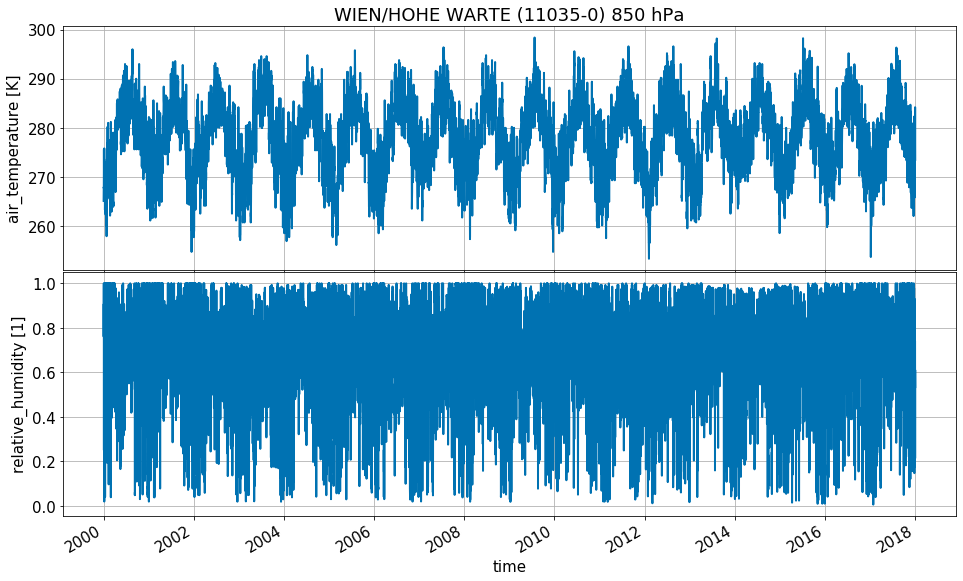

In [181]:
#
# Select 00Z, change dimension to pressure, drop missing values
#
plotdata = tdata.ta.swap_dims({'obs':'time'}).to_dataset()
plotdata['hur'] = rdata.hur.swap_dims({'obs':'time'})
#
# Plotting
#
f, [ax,ay] = subplots(2,1, sharex=True, figsize=(16,9))
plotdata.ta.dropna('time').plot(x='time', ax=ax)
plotdata.hur.dropna('time').plot(x='time', ax=ay)
ax.grid()
ax.set_xlabel('')
ay.grid()
subplots_adjust(hspace=0.01)
ax.set_title("{} {:.0f} hPa".format(tdata.attrs['station_name'], plotdata.plev.values[0]/100));

# Request multiple Stations

In [ ]:
import requests, zipfile, io, os
# http://early-upper-air.copernicus-climate.eu
r = requests.post('http://srvx8.img.univie.ac.at:8004',
                  headers={'content-type': 'application/json'},
                  json={"statid": ["11035", "11"],
                        "date": [20000101, 20001231],
                        "variable": ["temperature"],
                        "pressure_level": [85000, 85000]
                        },
                  stream=True)
#
# Check for known Error Message
#
if r.status_code != requests.codes.ok
     print(r.text)
     raise RuntimeError("Something is not correct with the request")
#
# Create directory
#
if not os.path.isdir('./example_data'):
    os.makedirs('./example_data')
#
# Unzip the Data Stream
#
try:
    z = zipfile.ZipFile(io.BytesIO(r.content))
    print("Retreived files: ")
    print(z.namelist())
    z.extractall(path='./example_data')
    z.close()
except:
    print(r.text)
    print("Error in request")

# Request ??

In [90]:
import xarray as xr

In [91]:
ident = '10393'  # Station Identifier

In [92]:
tdata = xr.load_dataset('example_data/dest_{}_air_temperature.nc'.format(ident))

In [93]:
rdata = xr.load_dataset('example_data/dest_{}_relative_humidity.nc'.format(ident))

## Temperature data in Xarray

Notice that there are the following variables:
* bias_estimate - Reanalysis Bias estimate
* obs_min_an - Analysis Departures
* obs_min_bg - First Guess Departures
* ta - Observations
* trajectory_index - CDM Identifier
* trajectory_label - CDM Identifier

In [94]:
tdata

<xarray.Dataset>
Dimensions:           (obs: 530917, trajectory: 27931)
Coordinates:
    lat               (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    lon               (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    plev              (obs) float32 2000.0 3000.0 5000.0 ... 92500.0 100000.0
    time              (obs) datetime64[ns] 2000-01-01T05:00:00 ... 2018-12-31T22:45:38
Dimensions without coordinates: obs, trajectory
Data variables:
    bias_estimate     (obs) float32 -0.08317 -0.048345 -0.070816 ... 0.00375 0.0
    obs_minus_an      (obs) float32 0.297017 0.598117 ... 0.20772 -0.036169
    obs_minus_bg      (obs) float32 0.733175 0.495885 ... -0.338893 0.347498
    ta                (obs) float32 201.7 203.1 207.1 ... 274.61 277.48 279.37
    trajectory_index  (obs) int32 0 0 0 0 0 0 ... 27930 27930 27930 27930 27930
    trajectory_label  (trajectory) |S5 b'11865' b'11866' ... b'39817' b'39818'
Attributes:
    primary_id:    0-20000-0-10393
    sta

## Relative humidity 

In [95]:
rdata

<xarray.Dataset>
Dimensions:           (obs: 530917, trajectory: 27931)
Coordinates:
    lat               (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    lon               (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    plev              (obs) float32 2000.0 3000.0 5000.0 ... 92500.0 100000.0
    time              (obs) datetime64[ns] 2000-01-01T05:00:00 ... 2018-12-31T22:45:38
Dimensions without coordinates: obs, trajectory
Data variables:
    bias_estimate     (obs) float32 nan nan nan nan nan ... nan nan nan nan nan
    hur               (obs) float32 nan nan nan nan ... 0.952928 1.0 1.0
    obs_minus_an      (obs) float32 nan nan nan ... -0.044241 0.022678 0.000384
    obs_minus_bg      (obs) float32 nan nan nan nan ... -0.026135 0.070745 8e-06
    trajectory_index  (obs) int32 0 0 0 0 0 0 ... 27930 27930 27930 27930 27930
    trajectory_label  (trajectory) |S5 b'11865' b'11866' ... b'39817' b'39818'
Attributes:
    primary_id:    0-20000-0-10393
    st

## Plotting

Text(0.5, 1.0, 'Radiosonde Temperature Observations from 10393 at 500 hPa')

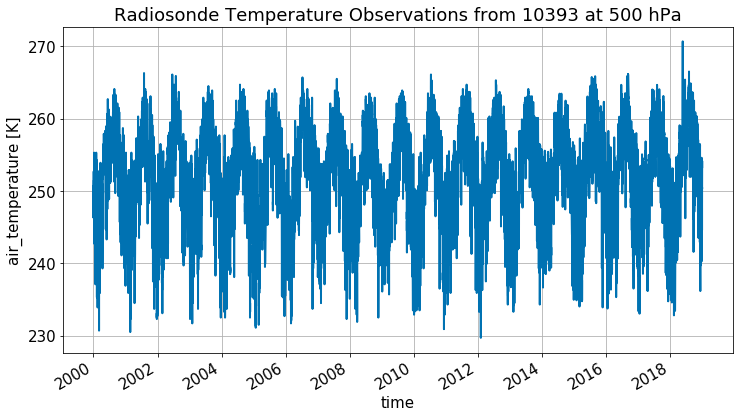

In [96]:
tdata.ta.sel(obs=(tdata.plev==50000)).swap_dims({'obs':'time'}).plot()
grid()
title("Radiosonde Temperature Observations from {} at 500 hPa".format(ident))

Text(0.5, 1.0, 'Radiosonde relative humidity Observations from 10393 at 500 hPa')

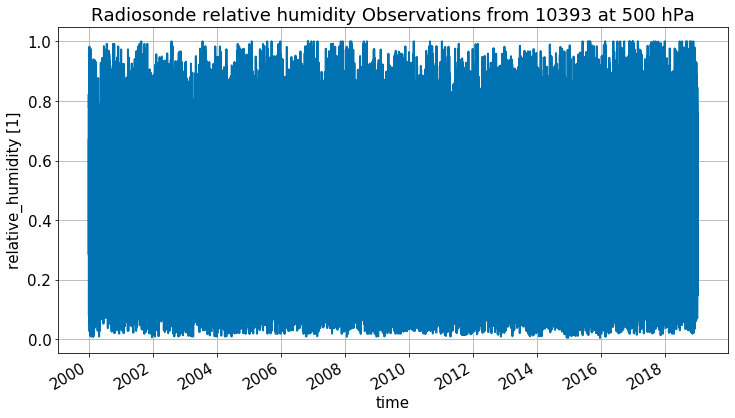

In [97]:
rdata.hur.sel(obs=(rdata.plev==50000)).swap_dims({'obs':'time'}).plot()
grid()
title("Radiosonde relative humidity Observations from {} at 500 hPa".format(ident))